# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Yudha Cahya Wijaya
- **Email:** m312b4ky4556@bangkit.academy
- **ID Dicoding:** m312b4ky4556

## Menentukan Pertanyaan Bisnis

- When are the busy times of people rode bicycle on workingday in a year?
- Does temperature affect the amount of user that used bicycle?
- How is the growth rate of registered user in a year?

## Import Semua Packages/Library yang Digunakan

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [10]:
day_df = pd.read_csv("data/day.csv")
hour_df = pd.read_csv("data/hour.csv")

print(day_df.head())
print(hour_df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

**Insight:**
- The difference between day_df and hour_df is hour_df has hr column which is day_df does not have it.

### Assessing Data

In [11]:
print(day_df.info())
print("duplicate: ", day_df.duplicated().sum())
print(day_df.describe())

print(hour_df.info())
print("duplicate: ", hour_df.duplicated().sum())
print(hour_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
duplicate:  0
          instant      season          yr        mnth     holiday     week

**Insight:**
- All of the datas already have a good quality
- I just need to change the type of dteday column from each table into datatime

### Cleaning Data

In [12]:
datetime_columns = ['dteday']

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
  hour_df[column] = pd.to_datetime(hour_df[column])

**Insight:**
- I can convert all of the values from dteday column into datetime

## Exploratory Data Analysis (EDA)

### Explore ...

In [20]:
# Question 1

workingday_df = hour_df.loc[hour_df['workingday'] == 1]
busy_hour_df = workingday_df.groupby(by="hr").agg({
    "cnt": 'mean'
})

print(busy_hour_df)
busy_hour_df.to_csv('dashboard/busy_hour.csv')

           cnt
hr            
0    36.786290
1    16.552632
2     8.683778
3     4.942553
4     5.429787
5    24.913131
6   102.500000
7   290.612903
8   477.006048
9   241.518145
10  135.366935
11  158.229839
12  200.820926
13  198.429719
14  183.572289
15  201.331325
16  293.122244
17  525.290581
18  492.226908
19  348.401606
20  249.718876
21  186.287149
22  138.389558
23   88.708835


**Insight:**
- In a year, the time of the highest bicycle use is at 5 PM
- In a year, the time of the lowest bicycle use is at 3 AM

In [14]:
def to_farenheit(temp):
  return (9*temp/5) + 32

In [21]:
# Question 2

cnt_bytemp = {}
cnt_bytemp['Category'] = ['Safe', 'Caution', 'Extreme Caution', 'Danger', 'Extreme Danger']
cnt_bytemp['Count'] = [
  day_df.loc[to_farenheit(day_df['temp']*41) < 80, 'cnt'].sum(),
  day_df.loc[(to_farenheit(day_df['temp']*41) >= 80) & (to_farenheit(day_df['temp']*41) < 90), 'cnt'].sum(),
  day_df.loc[(to_farenheit(day_df['temp']*41) >= 90) & (to_farenheit(day_df['temp']*41) < 103), 'cnt'].sum(),
  day_df.loc[(to_farenheit(day_df['temp']*41) >= 103) & (to_farenheit(day_df['temp']*41) < 124), 'cnt'].sum(),
  day_df.loc[to_farenheit(day_df['temp']*41) >= 125, 'cnt'].sum()
]

cnt_bytemp_df = pd.DataFrame(cnt_bytemp)
print(cnt_bytemp_df)
cnt_bytemp_df.to_csv('dashboard/cnt_bytemp.csv')

          Category    Count
0             Safe  2226234
1          Caution   966002
2  Extreme Caution   100443
3           Danger        0
4   Extreme Danger        0


**Insight:**

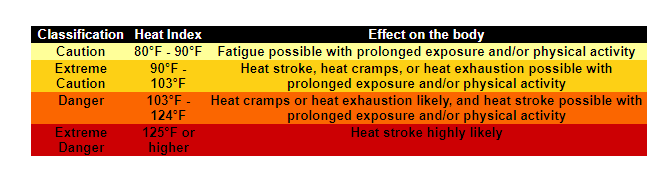

from: https://www.weather.gov/ama/heatindex

- there is a significant change of use rate based on the temperature

In [27]:
# Question 3

user_monthly_df = day_df.groupby(by="mnth").agg({
    'casual' : 'sum',
    'registered' : 'sum'
})

user_monthly_df['month'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Des']
user_monthly_df['growth casual(%)'] = user_monthly_df['casual'].pct_change() * 100
user_monthly_df['growth registered(%)'] = user_monthly_df['registered'].pct_change() * 100
user_monthly_df['growth casual(%)'] = user_monthly_df['growth casual(%)'].fillna(0)
user_monthly_df['growth registered(%)'] = user_monthly_df['growth registered(%)'].fillna(0)



print(user_monthly_df.head())
user_monthly_df.to_csv('dashboard/user_monthly.csv')

      casual  registered month  growth casual(%)  growth registered(%)
mnth                                                                  
1      12042      122891   Jan          0.000000              0.000000
2      14963      136389   Feb         24.256768             10.983717
3      44444      184476   Mar        197.025997             35.257242
4      60802      208292   Apr         36.805868             12.910080
5      75285      256401   May         23.819940             23.096902


**Insight:**
- The highest increase rate of registered users occured in the March
- In an early half year (January - May), the number of registered user is increased in used bicycle, but from June until December the number of registered user went down

## Visualization & Explanatory Analysis

### Pertanyaan 1:

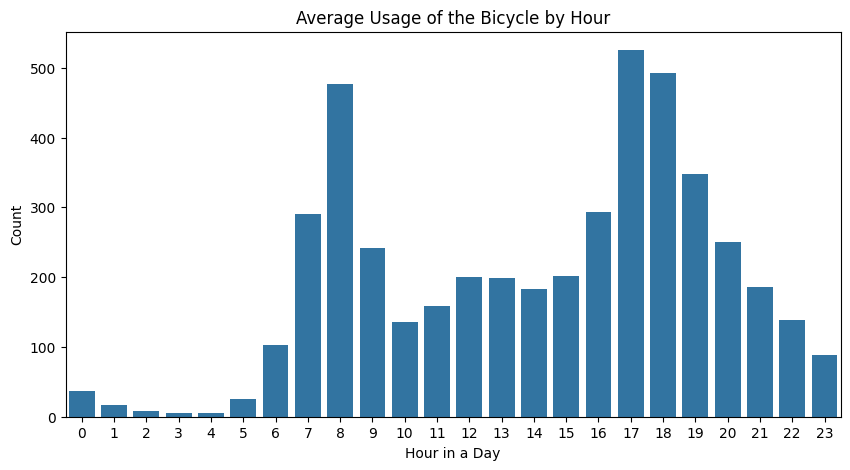

In [31]:
plt.figure(figsize=(10, 5))
sns.barplot(
    y = "cnt",
    x = "hr",
    data=busy_hour_df
)

plt.title("Average Usage of the Bicycle by Hour", loc='center')
plt.ylabel("Count")
plt.xlabel("Hour of the Day")
plt.tick_params(axis='x')
plt.show()

### Pertanyaan 2:

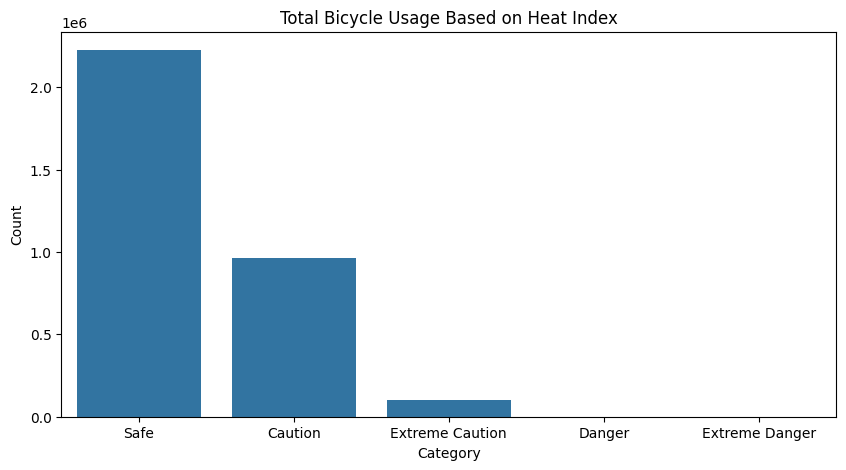

In [30]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=cnt_bytemp_df,
    y = 'Count',
    x = 'Category',
)

plt.title("Total Bicycle Usage Based on Heat Index", loc='center')
plt.tick_params(axis='x')
plt.show()

### Pertanyaan 3:

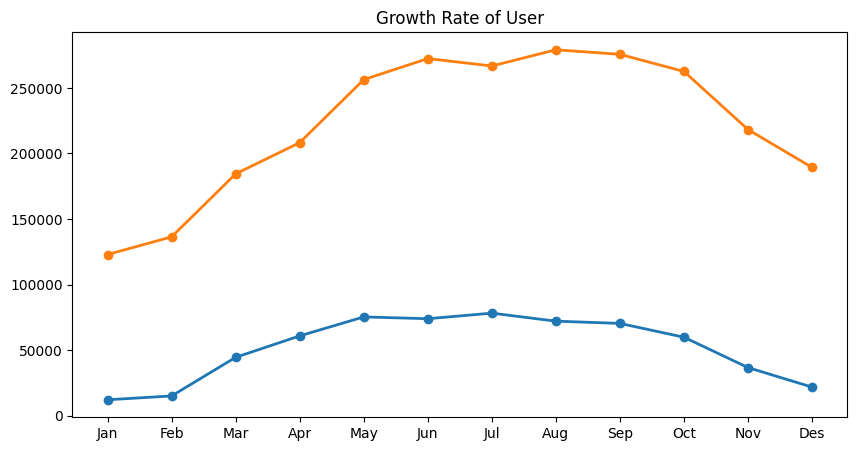

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(
    user_monthly_df['mnth'],
    user_monthly_df['casual'],
    marker='o',
    linewidth=2,
)

plt.plot(
    user_monthly_df['mnth'],
    user_monthly_df['registered'],
    marker='o',
    linewidth=2,
)

plt.title("Growth Rate of User", loc='center')
plt.show()

Insight:

- For the question 1 and 2, I use histogram to visualize the data because the data was discrete.
- For the other question, I use line graph because I want to see the difference/growth of the data

## Analisis Lanjutan (Opsional)

For the question number two, I implement an advanced analysis using clustering, especially manual grouping. From weather.gov, I got an information about heat index. Then, I make a group based on that heat index (safe, caution, extreme caution, etc.) and sort the data by that group.

## Conclusion

- Conclution question 1:
  From the graph, we can see that, most of people rode bicycle on workingday at 5 PM.
- Conclution question 2:
  From the graph, we can see that the number of people who rode bicycles decreased as the temperature increased. Therefore, we can conclude that the heat index affects the usage rate of bicycles.
- Conclusion question 3:
  From the graph, we can see that bicycle usage, both by casual and registered users, increased from January to June. For the next two months, the usage remained relatively stable. However, starting in September, there was a decline until December. The growth between registered and casual user was growing linear, so both of them was not affect each other.  